# Inhibitor Diffusion and Germination - Multiple Spores

## Numerical experiments - Week 50/2024

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

From this point on, the code is structured in Python modules, which are imported into the notebooks.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda, float32
import matplotlib.gridspec as gridspec

from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

## 1. Compilation of previous experiments

For the sake of better comparison, the experiments from the previous notebooks, plus an additional one using the permeation coefficient for glucose through a rodlet layer with the properties of a cellulose nanofibril (CNF) film, are repeated under the same framework, combining and saving the results. These include:

- Superficial release - concentration in cell wall volume:
    - 2D, $D$ of glucose/water;
    - 3D, $D$ of glucose/water;

- Release through barrier:
    - 2D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 3D, $P_s$ of lipid bilayer membrane, concentration in cell wall volume;
    - 2D, $P_s$ of CNF film, concentration in cell wall volume;
    - 3D, $P_s$ of CNF film, concentration in cell wall volume;
    - 2D, $P_s$ analytically fitted, concentration in cell wall volume;
    - 3D, $P_s$ analytically fitted, concentration in cell wall volume;

To estimate $P_s$ of the quasi-rodlet layer, the diffusion coefficient needs to be converted to a permeation constant using the supposed thickness of a rodlet layer $d=2$ nm and the octanol-water partition coefficient of glucose $K=10^{-3}$ (since the preference toward hydrophobins is assumed to be similar to the preference to lipids).

In [360]:
reload(st)
reload(df)
reload(conv)
reload(pt)

<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

In [404]:
d_rod = 0.002 # microns
K = 1e-3

D_glu_w = 600 # microns^2/s
D_glu_c = 17 # microns^2/s
Ps_lip = 1.9e-6 # microns/s
Ps_rod = conv.convert_D_to_Ps(D_glu_c, K, d_rod)
print(f"Permeation coefficient of quasi-rodlet layer: {Ps_rod} um/s")
Ps_fit = 0.0011743335023642336 # microns/s

V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018#6.52 # M
c_cell_wall = 1.018 # M

# Experiment parameters
global_id = '241219'
exp_params = [
    {'expID': global_id, 'simID': 'A1', 'label':'$D^{\\text{glu/w}}$, 2D', 'dims': 2, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'A2', 'label':'$D^{\\text{glu/w}}$, 3D', 'dims': 3, 'D': D_glu_w, 'Ps': None, 'c0': c_cell_wall},
    # {'expID': global_id, 'simID': 'A3', 'label':'$D^{\\text{glu/c}}$, 2D', 'dims': 2, 'D': D_glu_c, 'Ps': None, 'c0': c_cell_wall},
    # {'expID': global_id, 'simID': 'A4', 'label':'$D^{\\text{glu/c}}$, 3D', 'dims': 3, 'D': D_glu_c, 'Ps': None, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B1', 'label':'$P_s^{\\text{glu/lip}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B2', 'label':'$P_s^{\\text{glu/lip}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_lip, 'c0': c_spore},
    {'expID': global_id, 'simID': 'B3', 'label':'$P_s^{\\text{glu/c}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B4', 'label':'$P_s^{\\text{glu/c}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_rod, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B5', 'label':'$P_s^{\\text{fit}}$, 2D', 'dims': 2, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall},
    {'expID': global_id, 'simID': 'B6', 'label':'$P_s^{\\text{fit}}$, 3D', 'dims': 3, 'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall}
    ]

# General simulation parameters
t_max = 14400#1 # seconds
N = 255
dt = 0.005
dx = 5 # microns
n_save_frames = 100
A_spore = 150 # microns^2
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Run simulations
st.run_diffusion_experiments(exp_params, t_max, N, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Permeation coefficient of quasi-rodlet layer: 8.5 um/s
A1: Running simulation $D^{\text{glu/w}}$, 2D
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:31: RuntimeWarning: divide by zero encountered in divide
  result[0] = c_init


A2: Running simulation $D^{\text{glu/w}}$, 3D
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.


d:\MSc Computational Science\Master Thesis\msc-thesis\Code\diffusion.py:33: RuntimeWarning: divide by zero encountered in divide
  


B1: Running simulation $P_s^{\text{glu/lip}}$, 2D
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B2: Running simulation $P_s^{\text{glu/lip}}$, 3D
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.
B3: Running simulation $P_s^{\text{glu/c}}$, 2D
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B4: Running simulation $P_s^{\text{glu/c}}$, 3D
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.
B5: Running simulation $P_s^{\text{fit}}$, 2D
Simulation running for 2880000 steps on a lattice of size [1280 1280] microns.
B6: Running simulation $P_s^{\text{fit}}$, 3D
Simulation running for 2880000 steps on a lattice of size [1280 1280 1280] microns.


In [406]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ $[\mu m]$')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlim(0, N * dx)


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

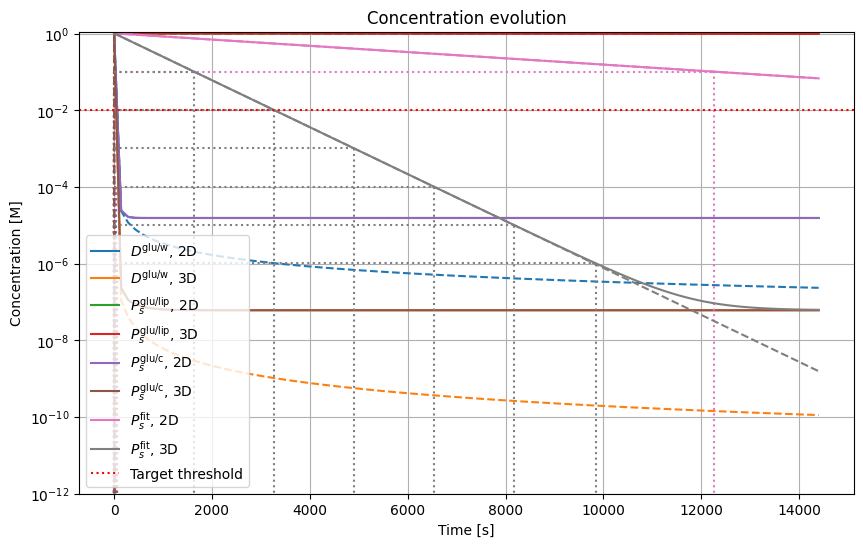

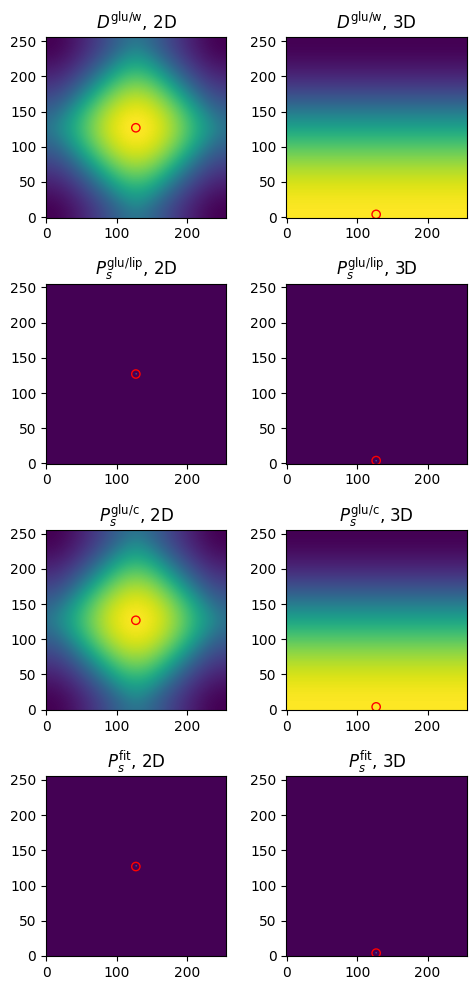

In [407]:
pt.plot_experiment_results(global_id, semilogy=True, target_thresh=0.01)

In [386]:
reload(pt)
reload(st)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ $[\mu m]$')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlim(0, N * dx)


<module 'setup' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\setup.py'>

In [387]:
N = 256
H = 512
dx = 5
spore_density_exponents = np.arange(5, 10, 1)
spore_densities = 10**spore_density_exponents
spore_density = 1e5#1e9 # spores per mL

spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density, H)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

Conversion: 1.00000000000000E-7 micrometers^-3
Effective density: 5.120000059832819e-05 spores/micrometer^3
Populating volume of 8256125 micrometers^3 with 422.7136049398723 spores, 20 spores per dimension
Spore spacing: 64.25 micrometers
Conversion: 0.00000100000000000000 micrometers^-3
Effective density: 0.0005119999987073243 spores/micrometer^3
Populating volume of 8256125 micrometers^3 with 4227.135989327508 spores, 65 spores per dimension
Spore spacing: 19.76923076923077 micrometers
Conversion: 0.0000100000000000000 micrometers^-3
Effective density: 0.005119999870657921 spores/micrometer^3
Populating volume of 8256125 micrometers^3 with 42271.35893213563 spores, 205 spores per dimension
Spore spacing: 6.2682926829268295 micrometers
Conversion: 0.000100000000000000 micrometers^-3
Effective density: 0.05119999870657921 spores/micrometer^3
Populating volume of 8256125 micrometers^3 with 422713.58932135627 spores, 650 spores per dimension
Spore spacing: 1.976923076923077 micrometers
C

In [384]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:31: SyntaxWarning: invalid escape sequence '\m'
  
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ $[\mu m]$')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlim(0, N * dx)


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_18264\1715446649.py:3: SyntaxWarning: invalid escape sequence '\m'
  title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)


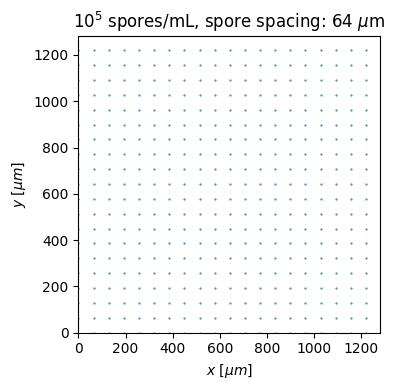

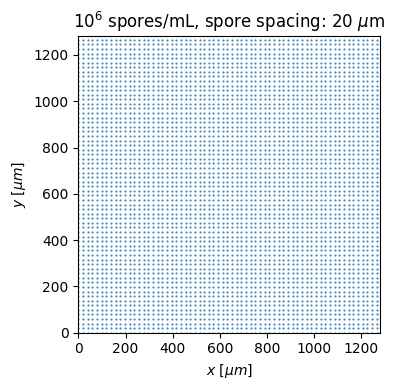

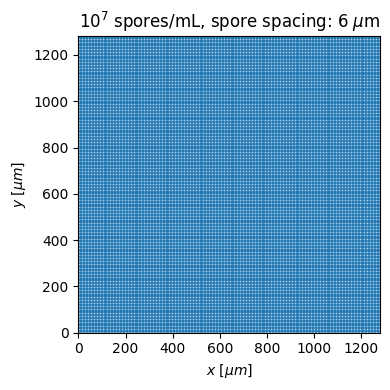

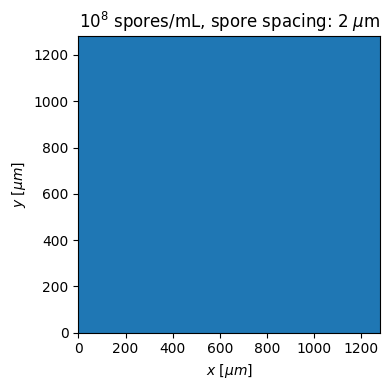

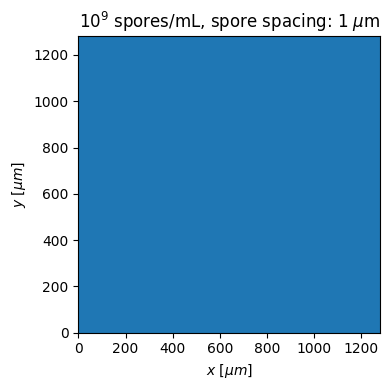

In [392]:
for i, spore_coords in enumerate(spore_coords_all):
    pt.plot_spore_positions(N, H, spore_coords[0], spore_coords[1], spore_coords[2], dx,
                            title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)

### Triangular grid of spores

In [401]:
reload(pt)
reload(st)

<module 'setup' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\setup.py'>

In [402]:
N = 256
H = 512
dx = 5
spore_density_exponents = np.arange(5, 10, 1)
spore_densities = 10**spore_density_exponents
spore_density = 1e5#1e9 # spores per mL

spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_tri_coords(N, dx, spore_density, H)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

Conversion: 1.00000000000000E-7 micrometers^-3
Effective density: 9155273116531756.0 spores/micrometer^3
Conversion: 0.00000100000000000000 micrometers^-3
Effective density: 9155273506844.53 spores/micrometer^3
Conversion: 0.0000100000000000000 micrometers^-3
Effective density: 9155274131.345016 spores/micrometer^3
Conversion: 0.000100000000000000 micrometers^-3
Effective density: 9155274.131345017 spores/micrometer^3
Conversion: 0.00100000000000000 micrometers^-3
Effective density: 9155.272132943663 spores/micrometer^3


In [400]:
print(spore_coords_all[-1])

[]


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_18264\1715446649.py:3: SyntaxWarning: invalid escape sequence '\m'
  title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)


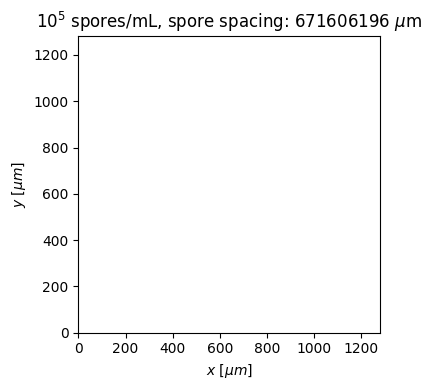

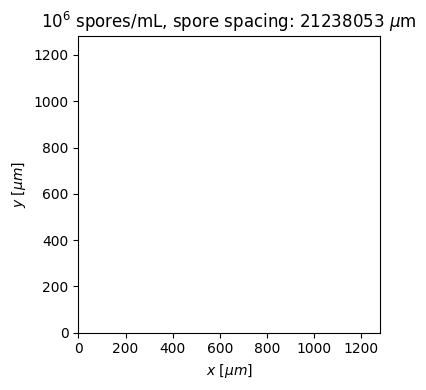

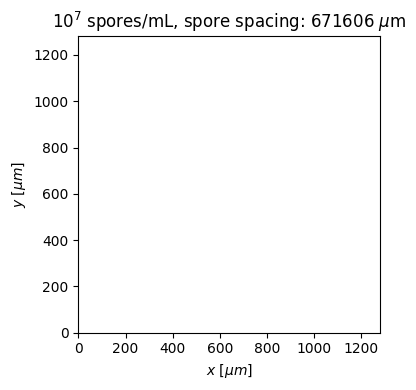

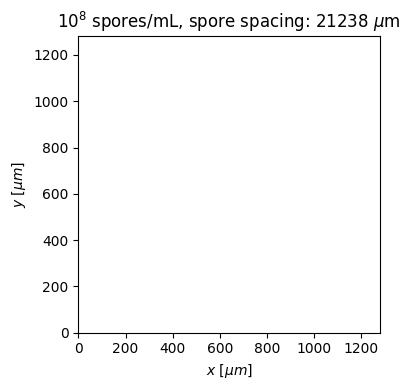

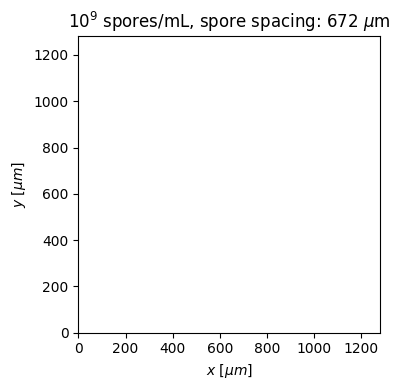

In [403]:
for i, spore_coords in enumerate(spore_coords_all):
    pt.plot_spore_positions(N, H, spore_coords[0], spore_coords[1], spore_coords[2], dx,
                            title=f'$10^{spore_density_exponents[i]}$ spores/mL, spore spacing: {round(spore_spacing_all[i])} $\mu$m', top_view=True)